In [1]:
#Import Library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')


In [2]:
print (os.getcwd())

C:\Users\Student


In [3]:
os.chdir ('C:\\Users\\Student\\Downloads\\')
print (os.getcwd())


C:\Users\Student\Downloads


In [4]:
#Read Data, display records
df=pd.read_csv("audi.csv")
display(df)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


In [6]:
print (len(df))

10668


In [7]:
display (df.shape)


(10668, 9)

In [8]:
display (df.dtypes )



model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [9]:
display (df.isna().sum() )


model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [10]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB
None


In [11]:
display (df.describe ())


,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [12]:
#Create X 
X = df.iloc[:,[0,1,3,4,5,6,7,8]].values
display (X.shape)
display (X)



(10668, 8)

array([[' A1', 2017, 'Manual', ..., 150, 55.4, 1.4],
       [' A6', 2016, 'Automatic', ..., 20, 64.2, 2.0],
       [' A1', 2016, 'Manual', ..., 30, 55.4, 1.4],
       ...,
       [' A3', 2020, 'Manual', ..., 150, 49.6, 1.0],
       [' Q3', 2017, 'Automatic', ..., 150, 47.9, 1.4],
       [' Q3', 2016, 'Manual', ..., 150, 47.9, 1.4]], dtype=object)

In [13]:
#Create Y
Y = df.iloc[:,[2]].values
display (Y.shape)
display (Y)



(10668, 1)

array([[12500],
       [16500],
       [11000],
       ...,
       [17199],
       [19499],
       [15999]], dtype=int64)

In [14]:
display(pd.DataFrame(X).head(5))


,0,1,2,3,4,5,6,7
0,A1,2017,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,Manual,1998,Petrol,145,49.6,1.0


In [15]:
#Label Encoding Column – Model and Fuel Type
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
X[:,0] = le1.fit_transform(X[:,0])
le2 = LabelEncoder()
X[:,-4] = le2.fit_transform(X[:,-4])
display (X)



array([[0, 2017, 'Manual', ..., 150, 55.4, 1.4],
       [5, 2016, 'Automatic', ..., 20, 64.2, 2.0],
       [0, 2016, 'Manual', ..., 30, 55.4, 1.4],
       ...,
       [2, 2020, 'Manual', ..., 150, 49.6, 1.0],
       [9, 2017, 'Automatic', ..., 150, 47.9, 1.4],
       [9, 2016, 'Manual', ..., 150, 47.9, 1.4]], dtype=object)

In [16]:
#One hot Encoding to column – transmission
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[2])],remainder='passthrough')
X = ct.fit_transform(X)
display (X.shape)
display (pd.DataFrame(X))



(10668, 10)

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.0,0,2017,15735,2,150,55.4,1.4
1,1.0,0.0,0.0,5,2016,36203,0,20,64.2,2.0
2,0.0,1.0,0.0,0,2016,29946,2,30,55.4,1.4
3,1.0,0.0,0.0,3,2017,25952,0,145,67.3,2.0
4,0.0,1.0,0.0,2,2019,1998,2,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...,...
10663,0.0,1.0,0.0,2,2020,4018,2,145,49.6,1.0
10664,0.0,1.0,0.0,2,2020,1978,2,150,49.6,1.0
10665,0.0,1.0,0.0,2,2020,609,2,150,49.6,1.0
10666,1.0,0.0,0.0,9,2017,8646,2,150,47.9,1.4


In [17]:
display (pd.DataFrame(X))


,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.0,0,2017,15735,2,150,55.4,1.4
1,1.0,0.0,0.0,5,2016,36203,0,20,64.2,2.0
2,0.0,1.0,0.0,0,2016,29946,2,30,55.4,1.4
3,1.0,0.0,0.0,3,2017,25952,0,145,67.3,2.0
4,0.0,1.0,0.0,2,2019,1998,2,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...,...
10663,0.0,1.0,0.0,2,2020,4018,2,145,49.6,1.0
10664,0.0,1.0,0.0,2,2020,1978,2,150,49.6,1.0
10665,0.0,1.0,0.0,2,2020,609,2,150,49.6,1.0
10666,1.0,0.0,0.0,9,2017,8646,2,150,47.9,1.4


In [18]:
#Features Scaling – Standardization 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
display (pd.DataFrame(X))


,0,1,2,3,4,5,6,7,8,9
0,-0.583268,1.200728,-0.712333,-1.123544,-0.046450,-0.386836,1.050783,0.357147,0.357550,-0.880218
1,1.714479,-0.832828,-0.712333,-0.160831,-0.507834,0.483989,-0.954181,-1.578323,1.037130,0.114925
2,-0.583268,1.200728,-0.712333,-1.123544,-0.507834,0.217781,1.050783,-1.429440,0.357550,-0.880218
3,1.714479,-0.832828,-0.712333,-0.545916,-0.046450,0.047853,-0.954181,0.282706,1.276528,0.114925
4,-0.583268,1.200728,-0.712333,-0.738459,0.876318,-0.971285,1.050783,0.282706,-0.090355,-1.543647
...,...,...,...,...,...,...,...,...,...,...
10663,-0.583268,1.200728,-0.712333,-0.738459,1.337702,-0.885343,1.050783,0.282706,-0.090355,-1.543647
10664,-0.583268,1.200728,-0.712333,-0.738459,1.337702,-0.972136,1.050783,0.357147,-0.090355,-1.543647
10665,-0.583268,1.200728,-0.712333,-0.738459,1.337702,-1.030381,1.050783,0.357147,-0.090355,-1.543647
10666,1.714479,-0.832828,-0.712333,0.609339,-0.046450,-0.688442,1.050783,0.357147,-0.221637,-0.880218


In [19]:
#Train Test Split 
from sklearn.model_selection import train_test_split
(X_train,X_test,Y_train,Y_test) = train_test_split(X,Y,test_size=0.2,random_state=0)
print (X.shape, Y.shape)
print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)


(10668, 10) (10668, 1)
(8534, 10) (8534, 1)
(2134, 10) (2134, 1)


In [20]:
#Create Random Forest Regressor 

from sklearn.ensemble import RandomForestRegressor
regression = RandomForestRegressor(random_state=0)
regression.fit(X_train,Y_train)
display (regression)


RandomForestRegressor(random_state=0)

In [21]:
#Prediction with Test Data 
y_pred = regression.predict(X_test)
display (y_pred)


array([14337.15, 23450.35, 27330.07, ..., 46275.18, 31359.  ,  9929.62])

In [22]:
#Display actual and Predicted Values 

print(np.concatenate((y_pred.reshape(len(y_pred),1),Y_test.reshape(len(Y_test),1)),1))



[[14337.15 14998.  ]
 [23450.35 21950.  ]
 [27330.07 28990.  ]
 ...
 [46275.18 45995.  ]
 [31359.   30500.  ]
 [ 9929.62  8400.  ]]


In [23]:
#Display – Accuracy and Mean Absolute Error 

from sklearn.metrics import r2_score,mean_absolute_error
print  ('R2 Score ', r2_score(Y_test, y_pred))
print  ('Mean Absolute Error', mean_absolute_error(Y_test,y_pred))



R2 Score  0.9536134841307546
Mean Absolute Error 1538.730980670462


In [24]:
#Create a Linear Regression Model 

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,Y_train)
print(reg)


LinearRegression()


In [26]:
#Prediction with Test Data 
y_pred = reg.predict(X_test)
display (y_pred)


array([[13095.68452601],
       [29385.18452601],
       [31838.80952601],
       ...,
       [42647.93452601],
       [31554.05952601],
       [ 7330.93452601]])

In [27]:
#Display actual and Predicted Values 

print(np.concatenate((y_pred.reshape(len(y_pred),1),Y_test.reshape(len(Y_test),1)),1))


[[13095.68452601 14998.        ]
 [29385.18452601 21950.        ]
 [31838.80952601 28990.        ]
 ...
 [42647.93452601 45995.        ]
 [31554.05952601 30500.        ]
 [ 7330.93452601  8400.        ]]


In [28]:
#Display – Accuracy and Mean Absolute Error 

from sklearn.metrics import r2_score,mean_absolute_error
print  ('R2 Score ', r2_score(Y_test, y_pred))
print  ('Mean Absolute Error', mean_absolute_error(Y_test,y_pred))


R2 Score  0.791557212866415
Mean Absolute Error 3379.6959434426058


In [29]:
#Prediction for complete data set 
y_pred = reg.predict(X)
display (y_pred)


array([[14664.68452601],
       [20566.30952601],
       [13847.43452601],
       ...,
       [19441.18452601],
       [20928.55952601],
       [16725.43452601]])

In [30]:
#Display the Actual and predicted data  

result = pd.concat([df,pd.DataFrame(y_pred)],axis=1)
display( result)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,0
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,14664.684526
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,20566.309526
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,13847.434526
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,19842.684526
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,17384.184526
...,...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0,19224.184526
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0,19311.184526
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0,19441.184526
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4,20928.559526


In [31]:
#Create Model Extra Tree Regressor 
from sklearn.ensemble import  ExtraTreesRegressor
ET_Model=ExtraTreesRegressor(n_estimators = 120)
ET_Model.fit(X_train,Y_train)
y_predict=ET_Model.predict(X_test)
from sklearn.metrics import r2_score,mean_absolute_error
print  ('R2 Score ', r2_score(Y_test, y_predict))
print  ('Mean Absolute Error', mean_absolute_error(Y_test,y_predict))



R2 Score  0.9555448495292738
Mean Absolute Error 1549.8807159221078


In [32]:
#Display the Result 
y_pred = reg.predict(X)
display (y_pred)
result = pd.concat([df,pd.DataFrame(y_pred)],axis=1)
display( result)




array([[14664.68452601],
       [20566.30952601],
       [13847.43452601],
       ...,
       [19441.18452601],
       [20928.55952601],
       [16725.43452601]])

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,0
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,14664.684526
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,20566.309526
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,13847.434526
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,19842.684526
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,17384.184526
...,...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0,19224.184526
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0,19311.184526
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0,19441.184526
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4,20928.559526


In [33]:
#Randomized searchCV
# Hyperparameter Tuning and RandomizedSearchCV - Model used – RandomForestRegressor

from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 80, stop = 1500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(6, 45, num = 5)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]


In [34]:
# create random grid

rand_grid={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf=RandomForestRegressor()

rCV=RandomizedSearchCV(estimator=rf,param_distributions=rand_grid,scoring='neg_mean_squared_error',n_iter=3,cv=3,random_state=42, n_jobs = 1)



In [37]:
#Fit Model

display (rCV.fit(X_train,Y_train))


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=3, n_jobs=1,
                   param_distributions={'max_depth': [6, 15, 25, 35, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [80, 237, 395, 553, 711,
                                                         868, 1026, 1184, 1342,
                                                         1500]},
                   random_state=42, scoring='neg_mean_squared_error')

In [36]:
#Prediction 
rf_pred=rCV.predict(X_test)
display (rf_pred)


array([14057.26019254, 23736.88249086, 28516.76982417, ...,
       48260.96319271, 31283.81261064, 10093.72655214])

In [39]:
#Mean_absolute_error and mean_squared_error

from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE',mean_absolute_error(Y_test,rf_pred))
print('MSE',mean_squared_error(Y_test,rf_pred))


MAE 1503.7440066397205
MSE 5669248.337669832


In [40]:

#Display Accuracy
display (r2_score(Y_test,rf_pred))



0.9587439029383267

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns


In [44]:
df=pd.read_csv("audi.csv")

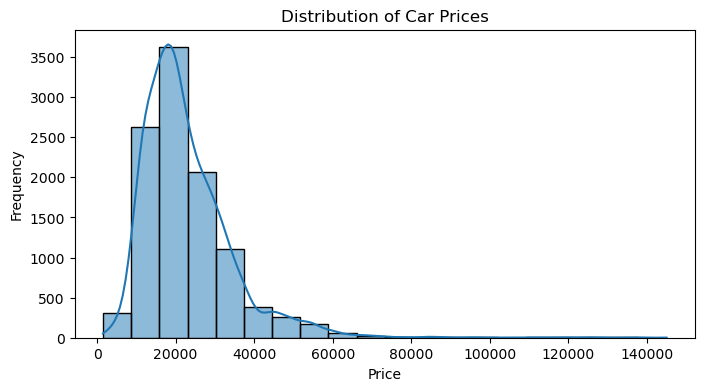

In [47]:
# Create a histogram of prices
plt.figure(figsize=(8, 4))
sns.histplot(df['price'], bins=20, kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Car Prices')
plt.show()

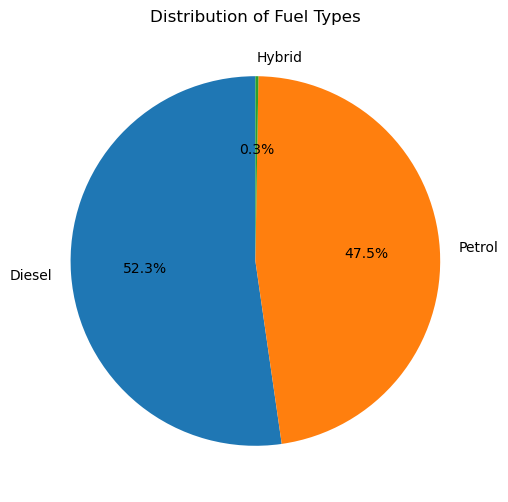

In [49]:
# Pie chart for "fuel type" distribution
fuel_type_counts = df['fuelType'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(fuel_type_counts, labels=fuel_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Fuel Types')
plt.show()

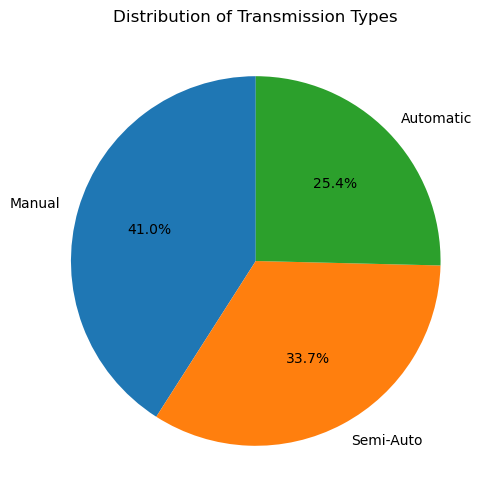

In [50]:
# Pie chart for "transmission" distribution
transmission_counts = df['transmission'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Transmission Types')
plt.show()

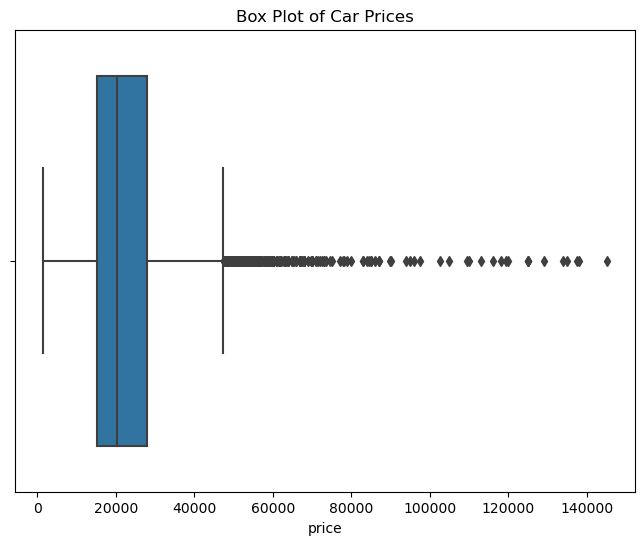

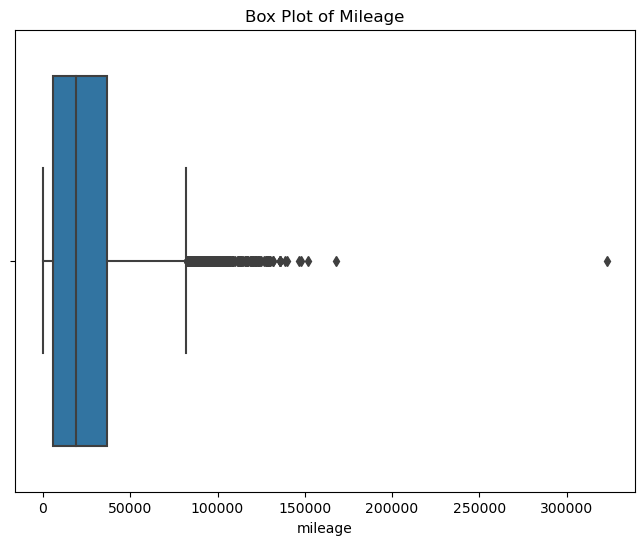

In [51]:
# Box plot for "price"
plt.figure(figsize=(8, 6))
sns.boxplot(x='price', data=df)
plt.title('Box Plot of Car Prices')
plt.show()

# Box plot for "mileage"
plt.figure(figsize=(8, 6))
sns.boxplot(x='mileage', data=df)
plt.title('Box Plot of Mileage')
plt.show()

In [61]:
pip install catboost

  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/e2/63/379617e3d982e8a66c9d66ebf4621d3357c7c18ad356473c335bffd5aba6/catboost-1.2.2-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     ---------------------------------------- 47.0/47.0 kB 2.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/101.0 MB ? eta -:--:--
   ---------------------------------------- 0.4/101.0 MB 8.7 MB/s eta 0:00:12
   ---------------------------------------- 1.0/101.0 MB 12.3 MB/s eta 0:00:09
    --------------------------------------- 1.5/101.0 MB 12.0 MB/s eta 0:00:09
    --------------------------------------- 2.1/101.0 MB 12.0 MB/s eta 0:00:09
   - -------------------------------------- 2.6/101.0 MB 11.9 MB/s eta 0:00:09
   - -------------------------------------- 3.2/101.0 MB 11.8 MB/s eta 0:00:09
   - -------------------------------------- 3.7/101.0 MB 11.8 MB/s eta 0:00:09
   - ----------

In [62]:
#Model CatBoostRegressor
from catboost import CatBoostRegressor
cat=CatBoostRegressor()
print (cat.fit(X_train,Y_train))


Learning rate set to 0.057452
0:	learn: 11184.0694779	total: 149ms	remaining: 2m 28s
1:	learn: 10690.2138498	total: 155ms	remaining: 1m 17s
2:	learn: 10221.1011877	total: 161ms	remaining: 53.7s
3:	learn: 9778.8067263	total: 168ms	remaining: 41.7s
4:	learn: 9382.6454054	total: 171ms	remaining: 34s
5:	learn: 8989.9290587	total: 174ms	remaining: 28.8s
6:	learn: 8628.4892653	total: 177ms	remaining: 25.1s
7:	learn: 8280.9179062	total: 180ms	remaining: 22.3s
8:	learn: 7950.5476053	total: 183ms	remaining: 20.1s
9:	learn: 7636.7735365	total: 186ms	remaining: 18.4s
10:	learn: 7349.6084699	total: 189ms	remaining: 17s
11:	learn: 7084.0457263	total: 192ms	remaining: 15.8s
12:	learn: 6842.7060927	total: 195ms	remaining: 14.8s
13:	learn: 6608.0244743	total: 199ms	remaining: 14s
14:	learn: 6387.7285726	total: 204ms	remaining: 13.4s
15:	learn: 6170.1354894	total: 208ms	remaining: 12.8s
16:	learn: 5973.9133066	total: 213ms	remaining: 12.3s
17:	learn: 5780.4713044	total: 219ms	remaining: 12s
18:	learn: 

In [63]:

#Cat Boost Prediction 
cat_pred=cat.predict(X_test)
display (cat_pred)


array([13386.63817795, 24056.86842882, 28082.99514751, ...,
       45959.31234642, 31714.44751009,  9481.45994163])

In [64]:
#Cat Boost Accuracy
display (r2_score(Y_test,cat_pred))


0.9641612028134969

In [65]:
#Create Pickle File 
#Use pickle to save our model so that we can use it later
import pickle 
# Saving model to disk
pickle.dump(cat, open('model.pkl','wb'))



In [66]:
#Load Pickle File and  do Prediction  
model=pickle.load(open('model.pkl','rb'))
print (model.predict (X_train))


[14256.69390956 29475.32741129 11911.12888914 ... 21406.16876331
 17189.65426694 44839.56117235]
